<a href="https://colab.research.google.com/github/RobertMichuki/A-Python-Project-Predicting-the-Results-of-a-Football-Game./blob/main/Mchezo_Pesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).
You have two possible approaches (as shown below) given the datasets that will be provided; 
1.  Polynomial Approach
2.  Logistic Approach





In order to work on the above problem, we will do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
This will be done by carrying out the following steps:

- Performing EDA

- Performing any necessary feature engineering 

- Checking for multicollinearity

- Building the model

- Cross-validate the model

- Compute RMSE

- Create residual plots for your models, and assess their heteroscedasticity 
using Bartlett’s test

- Perform appropriate regressions on the data including your justification

- Challenge our solution by providing insights on how we can make improvements.








**Approach 1:** Polynomial approach

What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.


In [3]:
# Loading required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics



In [8]:
# Loading dataset
fifa_ranking = pd.read_csv("fifa_ranking.csv")
results = pd.read_csv("results.csv")

### **Exploratory Data Analysis**

In [9]:
# Viewing the first five entries for both datasets
fifa_ranking.head()
results.head()
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [10]:
# Checking last five entries for both datasets

fifa_ranking.tail()
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
# Looking at the common variables in the two datasets before merging
results['date'].unique()

# The years run from 1872 to 2019

fifa_ranking['rank_date'].unique()
# The years run from 1993 to 2006

results['country'].value_counts()
# There are 266 unique countries

fifa_ranking['country_full'].value_counts()
# There are 209 unique countries

Sudan                    325
Germany                  286
Burkina Faso             286
Myanmar                  286
Congo                    286
                        ... 
Zaire                     66
Serbia and Montenegro     43
Kosovo                    24
Gibraltar                 22
RCS                        5
Name: country_full, Length: 216, dtype: int64

In [14]:
# merging the two datasets
# Renaming the columns we'll merge it on i.e date and rank_date in fifa_ranking dataset and country_full(fifa_ranking) and country(results)
fifa_ranking.rename(columns = {'rank_date':'date'}, inplace = True)
fifa_ranking.rename(columns = {'country_full':'country'}, inplace = True)

# Merging the two datasets and naming it 'data'
dataset = pd.merge(fifa_ranking, results, how = 'inner')

# Viewing first 5 entries of our merged dataset
dataset.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,...,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,False
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,...,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,...,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False


In [15]:
## checking for data types and missing values in the dataset
dataset.info()
dataset.describe()

# data consists of numeric and categorical variables
# dataset has 23 columns and 950 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     950 non-null    int64  
 1   country                  950 non-null    object 
 2   country_abrv             950 non-null    object 
 3   total_points             950 non-null    float64
 4   previous_points          950 non-null    int64  
 5   rank_change              950 non-null    int64  
 6   cur_year_avg             950 non-null    float64
 7   cur_year_avg_weighted    950 non-null    float64
 8   last_year_avg            950 non-null    float64
 9   last_year_avg_weighted   950 non-null    float64
 10  two_year_ago_avg         950 non-null    float64
 11  two_year_ago_weighted    950 non-null    float64
 12  three_year_ago_avg       950 non-null    float64
 13  three_year_ago_weighted  950 non-null    float64
 14  confederation            9

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,64.905263,52.182116,474.214737,-0.116842,26.510495,26.510495,25.184116,12.592032,26.657200,7.997221,25.412653,5.082516,1.657895,1.042105
std,48.075168,190.135933,318.043068,4.420952,97.787086,97.787086,99.671465,49.835482,100.257323,30.077366,94.555624,18.911083,1.918743,1.234521
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,233.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,96.000000,0.000000,662.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,201.000000,1332.160000,1683.000000,30.000000,855.300000,855.300000,1008.940000,504.470000,748.610000,224.580000,640.010000,128.000000,31.000000,12.000000


In [16]:
# Checking for missing data
dataset.isna().sum()

# There are no missing values

# Checking for duplicates
dataset.duplicated().sum()

# There are no duplicates


0

In [17]:
# Dropping the variables we won't need by their respective indices
dataset = dataset.drop(dataset.iloc[:,6:14],axis = 1)
dataset = dataset.drop(['country_abrv'], axis = 1)
dataset.info()


# We now have 950 entries and 14 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             950 non-null    int64  
 1   country          950 non-null    object 
 2   total_points     950 non-null    float64
 3   previous_points  950 non-null    int64  
 4   rank_change      950 non-null    int64  
 5   confederation    950 non-null    object 
 6   date             950 non-null    object 
 7   home_team        950 non-null    object 
 8   away_team        950 non-null    object 
 9   home_score       950 non-null    int64  
 10  away_score       950 non-null    int64  
 11  tournament       950 non-null    object 
 12  city             950 non-null    object 
 13  neutral          950 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 104.8+ KB


## **Univariate Data Analysis**

### **Numerical Variables**

In [18]:
# Checking the descriptive statistics for our numeric variables in the dataset
# This shows the count, mean, standard deviation, minimum and maximum values and the quantiles
dataset.describe()

# The count statistic for each variable confirms that there's no missing data

# The maximum score attained is 31, which is rare
# A quick google search confirms that this happened: https://en.wikipedia.org/wiki/Australia_31%E2%80%930_American_Samoa
# Realistically, the most a team can score in a match is 5.
# We shall proceed to look at the number of rows that record a home and away score greater than 5

dataset[dataset['home_score'] > 5]
# There are rows with home scores greater than 5

dataset[dataset['away_score']>5]
# There are rows with home scores greater than 5

# Since this is very rare and might affect our model, we shall drop all entries where the home and away scores are greater than 5
dataset.drop(dataset.loc[dataset['home_score'] > 5].index, inplace=True)
dataset.drop(dataset.loc[dataset['away_score'] > 5].index, inplace=True)

# Now checking what the maximum score was
dataset.describe()

# Our dataset now has 913 entries

,rank,total_points,previous_points,rank_change,home_score,away_score
count,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,64.056955,50.374984,476.369113,-0.083242,1.450164,0.998905
std,47.517183,188.072537,319.742163,4.323497,1.259169,1.057035
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000
25%,24.000000,0.000000,235.000000,-2.000000,0.000000,0.000000
50%,55.000000,0.000000,490.000000,0.000000,1.000000,1.000000
75%,96.000000,0.000000,665.000000,1.000000,2.000000,2.000000
max,201.000000,1332.160000,1683.000000,30.000000,5.000000,5.000000


In [19]:
# Checking for range, quantiles, mode, interquantile range for the numeric variables

# First, we create a list of our numerical variables in the Fifa Ranking dataset
dataset_numerical = dataset[['rank', 'total_points','previous_points',
                               'rank_change', 'home_score', 'away_score']]


In [20]:
# Mode

dataset_mode = dataset_numerical.mode()
dataset_mode

# The mode value for all numerical variables is zero except home score which was mostly 1, previous points which was mostly 40 and rank which was mostly 12

,rank,total_points,previous_points,rank_change,home_score,away_score
0,12,0.0,40,0,1,0


**Skewness** is a statistical measure of asymmetric distribution of data. A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values. A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values. A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** helps determine if the distribution is heavy-tailed compared to a normal distribution. The kurtosis of a normal distribution is 3. If a given distribution has a kurtosis greater than 3 then it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution. If it's less than 3, it means it tends to produce fewer and less extreme outliers than the normal distribution.

**Range** is an index of variability. When the range is more the group is more variable. The smaller the range the more homogeneous is the group.

The further the **interquartile range** is from 0, the more spread out the data points are.

In [21]:
# Range
dataset_range = dataset_numerical.max() - dataset_numerical.min()
dataset_range

# The output shows the respective difference between the maximum and minimu values per variable


rank                200.00
total_points       1332.16
previous_points    1683.00
rank_change          52.00
home_score            5.00
away_score            5.00
dtype: float64

In [22]:
# Interquantile range for the fifa numeric variables
dataset_IQR = dataset_numerical.quantile(.75) - dataset_numerical.quantile(.25)
dataset_IQR

rank                72.0
total_points         0.0
previous_points    430.0
rank_change          3.0
home_score           2.0
away_score           2.0
dtype: float64

In [23]:
# kurtosis and skewness
dataset_numerical.apply(['kurt', 'skew'])

# Rank has a negative kurtosis
# Most variables except total points and rank change have a kurtosis > 3
# All the variables are positively skewed
# Rank, previous points and home score have a skewness measure of 0 meaning their distributions are symmetrical

,rank,total_points,previous_points,rank_change,home_score,away_score
kurt,-0.352568,19.650840,0.435775,10.250212,0.165387,0.866027
skew,0.701461,4.360967,0.560581,1.181166,0.779922,1.062889


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

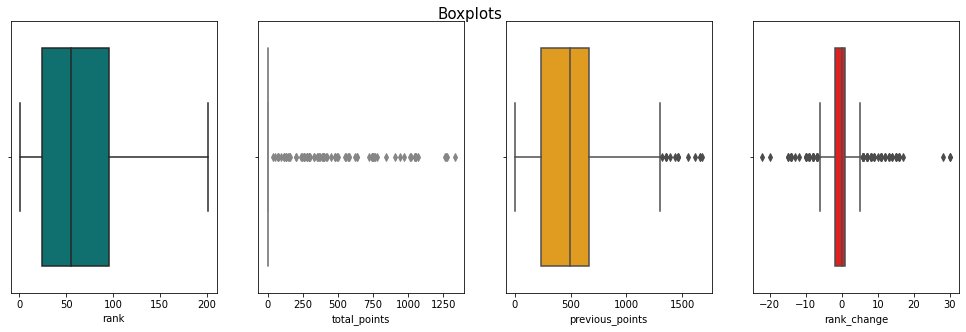

In [24]:
# Checking for outliers
# We'll use boxplots to visualize each variable and its outliers

# Plotting boxplots to check for outliers

fig, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize=(17,5 ))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
sns.boxplot(dataset['rank'], ax=ax1, color = "teal")
sns.boxplot(dataset['total_points'], ax=ax2, color = "pink")
sns.boxplot(dataset['previous_points'], ax=ax3, color = "orange")
sns.boxplot(dataset['rank_change'], ax=ax4, color = "red")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


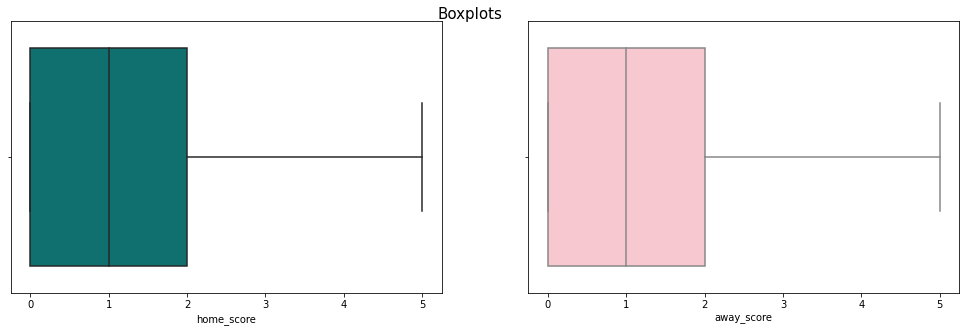

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(17,5 ))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
sns.boxplot(dataset['home_score'],ax=ax1, color = "teal")
sns.boxplot(dataset['away_score'],ax=ax2, color = "pink")

Total Points, Previous Points and Rank change have outliers, however it would be best if we retained them as they represent the true situation. The rest of the variables don't.

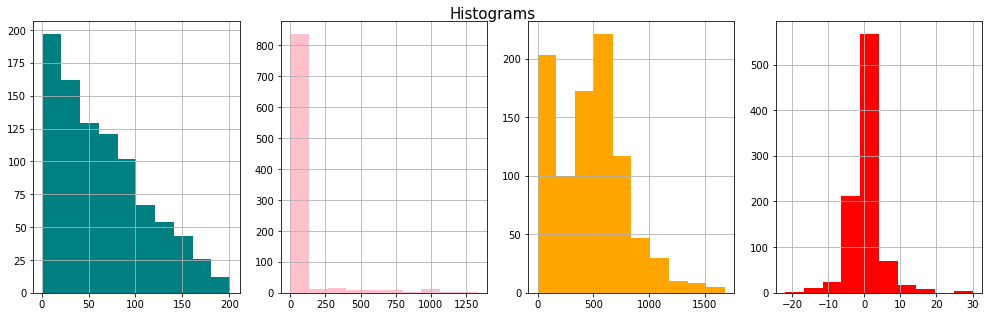

In [26]:
# Histograms showing the numeric variables distributions 
        
fig, (hist1,hist2, hist3,hist4) = plt.subplots(1,4, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
dataset['rank'].hist(ax=hist1, color = "teal")
dataset['total_points'].hist(ax=hist2, color = "pink")
dataset['previous_points'].hist(ax=hist3, color = "orange")
dataset['rank_change'].hist(ax=hist4, color = "red")


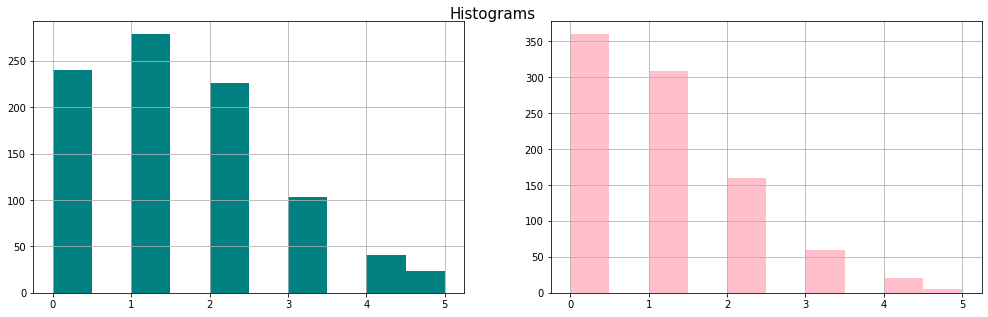

In [27]:
fig, (hist1,hist2) = plt.subplots(1,2, figsize=(17, 5))
plt.suptitle('Histograms', fontsize = 15, y = 0.92, color = 'black')
dataset['home_score'].hist(ax=hist1, color = "teal")
dataset['away_score'].hist(ax=hist2, color = "pink")

### **Categorical Variables**

In [28]:
# Looking at our categorical variables
# Here we get to see the count, unique categories, top category and the frequency and the data type per each categorical variable

dataset['country'].describe()
# There are 154 countries where the matches were played
# Most of them were in France, 24 times to be exact

dataset['confederation'].describe()
# There are 6 types of confederations considered
# The top most is UEFA and it has a frequency of 471

dataset['tournament'].describe()
# There are 36 unique types of tournaments.
# They were mostly Friendly touraments with a frequency of 591

dataset['city'].describe()
# There are 398 unique cities. 
# Doha was the most frequent city, appearing 15 times

dataset['home_team'].describe()
# The team that played in their country most times was Estonia, with a frequency of 17 times
# There were 181 times when a team played from their country

dataset['away_team'].describe()
# The team that played away most times was Uruguay with a frequency of 15
# Different teams played 'away' 185 times

dataset['neutral'].describe()
# Most games were not played at a neutral venue i.e 784 times

count       913
unique        2
top       False
freq        784
Name: neutral, dtype: object

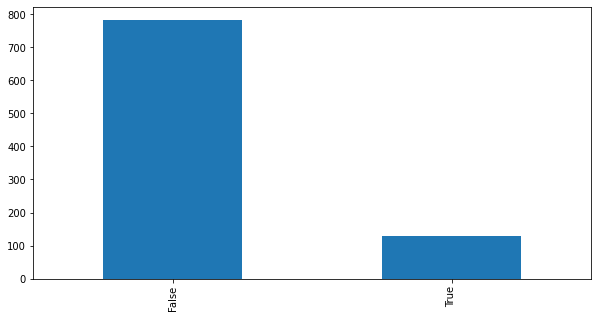

In [29]:
# Visualizing distribution of neutrality of the game venues
dataset['neutral'].value_counts().plot(kind='bar',figsize=(10,5))

# Games were mostly played at non-neutral venues

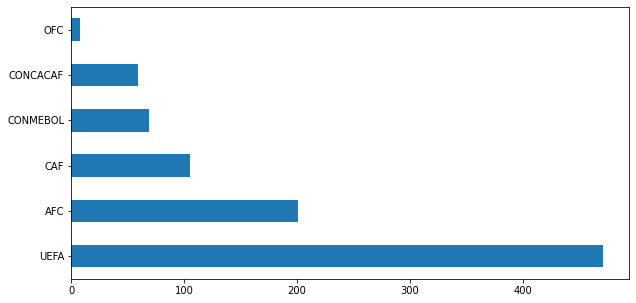

In [30]:
# Visualizing number of times different confederations featured in a match
dataset['confederation'].value_counts().plot(kind='barh',figsize=(10,5))

# UEFA was leading and OFC had the least frequency

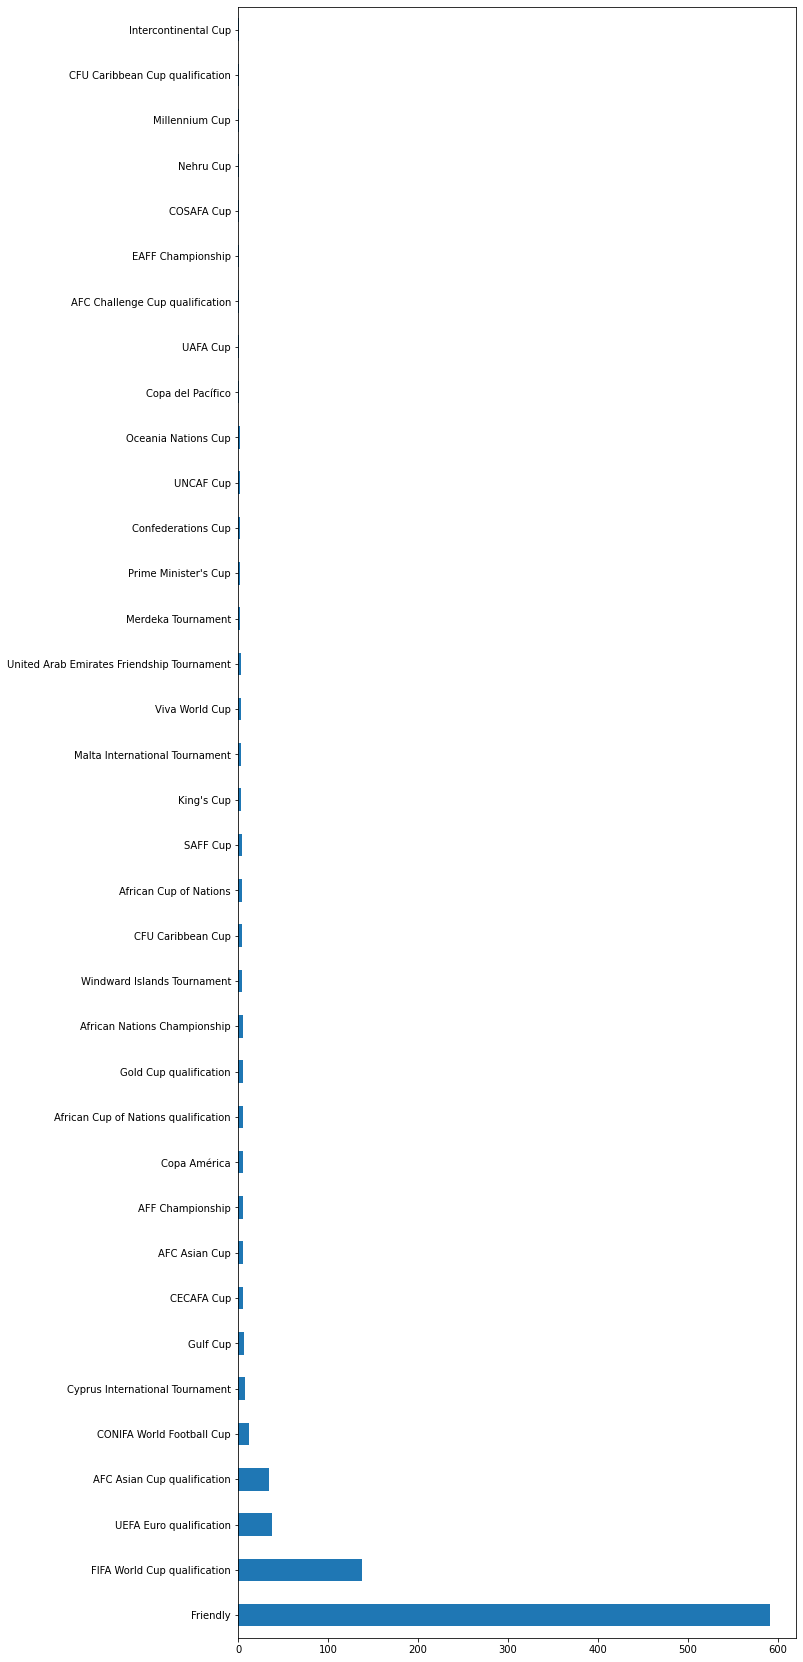

In [31]:
# Visualizing number of times different tournaments took place
dataset['tournament'].value_counts().plot(kind='barh',figsize=(10,30))

# Output confirms that majority of the tournaments were Friendly followed by Fifa World Cup qualification. South Pacific Games were the least

## **Bivariate Analysis**

How were the different confederations distributed among the home scores?

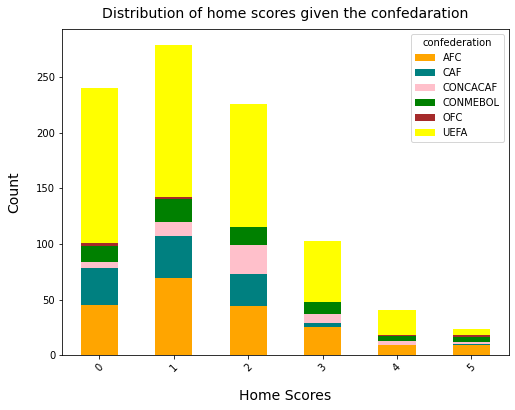

In [32]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by home score and the confederations

home_scores = dataset.groupby(['home_score', 'confederation']).count()
home_scores

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
home_scores_pivot = home_scores.pivot_table(index=['home_score'],columns = ['confederation'],values = 'rank')
home_scores_pivot

# Plotting our stacked column chart
home_scores_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal','pink', 'green','brown','yellow'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of home scores given the confedaration", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Home Scores", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Each confederation was represented in the home scores.
Very few teams scored 5 in their home countries across the matches organized by the different confederations.

Most teams scored 1, followed by 0 then 2 except for the games organized by CONNCACAF which had majority scoring 2.

 In all score categories, games organized by UEFA were the majority.


How were the different confederations distributed among the away scores?

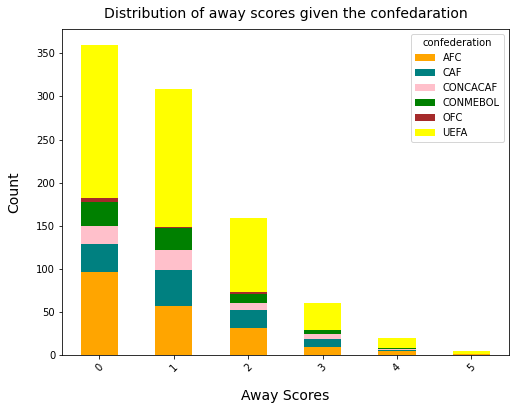

In [33]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by away score and the confederations

away_scores = dataset.groupby(['away_score', 'confederation']).count()
away_scores

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
away_scores_pivot = away_scores.pivot_table(index=['away_score'],columns = ['confederation'],values = 'rank')
away_scores_pivot

# Plotting our stacked column chart
away_scores_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal','pink', 'green','brown','yellow'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of away scores given the confedaration", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Away Scores", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Majority of the away teams scored 0 regardless of the confederation.

Games by the CAF confederation are the only ones which had more of the teams scoring 1 compared to all other scores. For the rest of the confederations, majority of the teams scored 0, followed by 1, 2,..., 5.

Were most games by the different confederations played on neutral grounds?

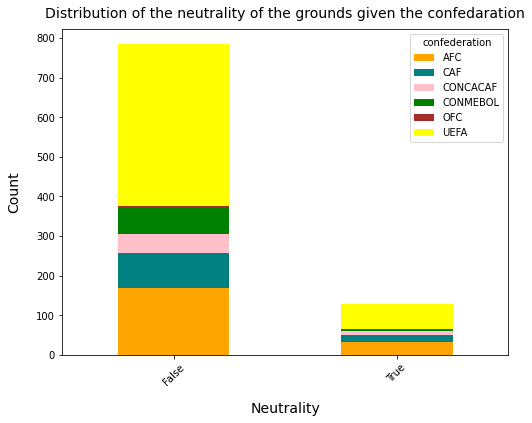

In [34]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by neutrality and the confederations

neutrality = dataset.groupby(['neutral', 'confederation']).count()
neutrality

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
neutrality_pivot = neutrality.pivot_table(index=['neutral'],columns = ['confederation'],values = 'rank')
neutrality_pivot

# Plotting our stacked column chart
neutrality_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal','pink', 'green','brown','yellow'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of the neutrality of the grounds given the confedaration", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Neutrality", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Majority of the confederations held games in non neutral grounds.

How were the scores for teams in their home countries distributed given the neutrality of the grounds?

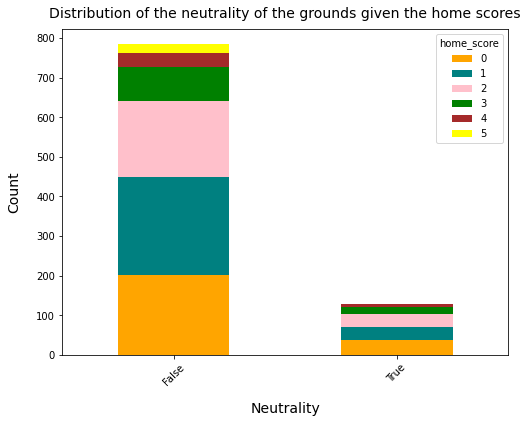

In [35]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by neutrality and the home scores

home_score_neutrality = dataset.groupby(['home_score', 'neutral']).count()
home_score_neutrality

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
home_score_neutrality_pivot = home_score_neutrality.pivot_table(index=['neutral'],columns = ['home_score'],values = 'rank')
home_score_neutrality_pivot

# Plotting our stacked column chart
home_score_neutrality_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal','pink', 'green','brown','yellow'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of the neutrality of the grounds given the home scores", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Neutrality", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Home teams only managed to score 5 in non neutral grounds. 

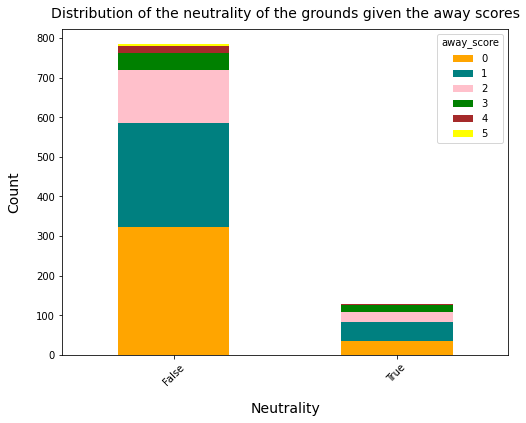

In [36]:
# Creating the stacked column chart

# First, we'll create a table grouping our data by neutrality and the away scores

away_score_neutrality = dataset.groupby(['away_score', 'neutral']).count()
away_score_neutrality

# We then use pd.pivot_table() to transform our long format dataframe to a wide format dataframe.
away_score_neutrality_pivot = away_score_neutrality.pivot_table(index=['neutral'],columns = ['away_score'],values = 'rank')
away_score_neutrality_pivot

# Plotting our stacked column chart
away_score_neutrality_pivot.plot(kind='bar',stacked = True, figsize=(8, 6), color =['orange','teal','pink', 'green','brown','yellow'])

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Distribution of the neutrality of the grounds given the away scores", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Count", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Neutrality", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Teams playing on non neutral grounds managed to score 5.

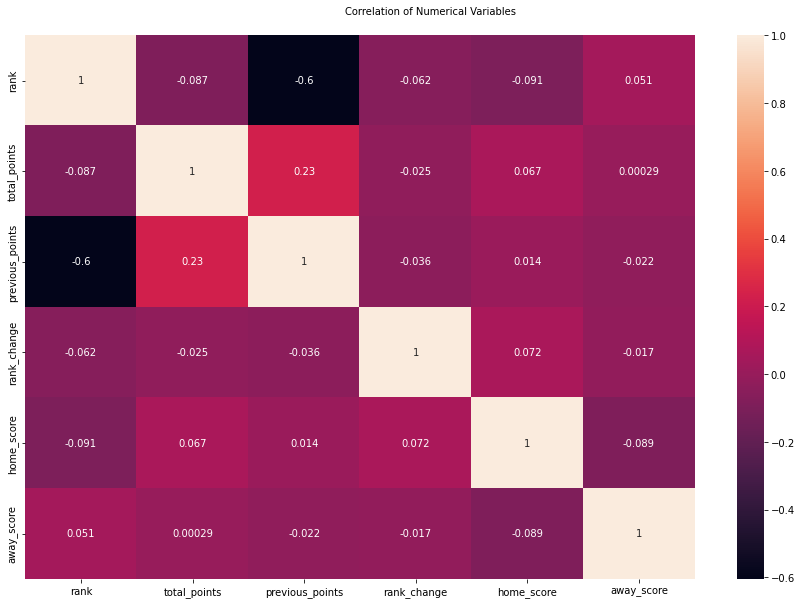

In [37]:
# Checking the correlation matrix of the numerical variables by visualizing using a heatmap
# A correlation of +1 means there's a strong positive correlation while 0 means there's no correlation.

fig, (dataset_corr) = plt.subplots( figsize=(15, 10))
plt.suptitle('Correlation of Numerical Variables', fontsize = 10, y = 0.92, color = 'black')
dataset_corr = sns.heatmap(dataset_numerical.corr(),annot=True)
plt.show()

From the correlation heatmap we see that there are variables with strong negative correlation eg rank and previous points (-0.6) while the variable with the strongest positive correlation is total points and current year average and previous points (0.23).

Majority of the variables either had no correlation or a negative correlation.

In [38]:
# Encoding our categorical variables
# Renaming our dataset to 'data'
data = dataset
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['neutral'] = en.fit_transform(data['neutral'])
data['confederation'] = en.fit_transform(data['confederation'])
data['tournament'] = en.fit_transform(data['tournament'])
data['country'] = en.fit_transform(data['country'])
data['city'] = en.fit_transform(data['city'])
data['home_team'] = en.fit_transform(data['home_team'])
data['away_team'] = en.fit_transform(data['away_team'])
data

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,20,0.00,55,-5,3,1993-08-08,23,100,1,1,18,195,0
1,35,36,0.00,23,30,3,1993-08-08,46,177,5,0,17,285,0
2,50,153,0.00,27,4,1,1993-08-08,180,53,2,0,18,124,0
3,59,17,0.00,13,28,3,1993-08-08,20,175,3,1,17,170,0
4,65,54,0.00,23,-2,1,1993-08-08,67,144,1,0,18,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,12,39,1050.84,1040,1,5,2018-06-07,88,160,4,2,10,64,1
946,14,144,1018.41,976,3,3,2018-06-07,171,176,3,0,18,223,0
947,22,60,908.01,930,0,5,2018-06-07,73,62,2,2,18,291,0
948,26,8,844.70,841,0,5,2018-06-07,150,19,0,0,18,132,1


<ipython-input-39-ba7fb435bb7c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  categorical_variables = data.drop(['rank', 'total_points','previous_points',


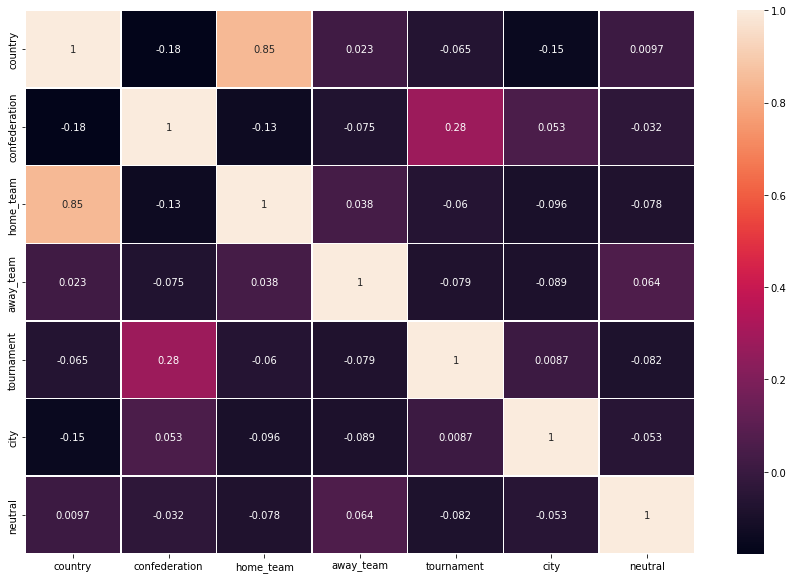

In [39]:
# Subsetting the data
categorical_variables = data.drop(['rank', 'total_points','previous_points',
                               'rank_change', 'home_score', 'away_score'],1)

# Creating a correlation matrix for our categorical variables
corrMatrix = categorical_variables.corr()
corrMatrix

# Vizualising the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

Country where the game was played had a strong positive correlation (0.85) with the home team variable.

Majority of the categorical variables had a negative correlation or close to no correlation.

Confederation and country had the strongest negative correlation (-0.18).

#Feature Engineering

In [40]:
# Reassigning dataset before encoding to df
df = dataset
df.head()

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,20,0.0,55,-5,3,1993-08-08,23,100,1,1,18,195,0
1,35,36,0.0,23,30,3,1993-08-08,46,177,5,0,17,285,0
2,50,153,0.0,27,4,1,1993-08-08,180,53,2,0,18,124,0
3,59,17,0.0,13,28,3,1993-08-08,20,175,3,1,17,170,0
4,65,54,0.0,23,-2,1,1993-08-08,67,144,1,0,18,77,0


In [41]:
# Creating a new column in the dataset
# This column will contain the perfomance of the home team
# whether win, draw or loss
# The new column is goal_diff i.e. 
# difference in goals between the home and the away teams

df['goal_diff'] = df['home_score'] - df['away_score']
df.head()

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,goal_diff
0,8,20,0.0,55,-5,3,1993-08-08,23,100,1,1,18,195,0,0
1,35,36,0.0,23,30,3,1993-08-08,46,177,5,0,17,285,0,5
2,50,153,0.0,27,4,1,1993-08-08,180,53,2,0,18,124,0,2
3,59,17,0.0,13,28,3,1993-08-08,20,175,3,1,17,170,0,2
4,65,54,0.0,23,-2,1,1993-08-08,67,144,1,0,18,77,0,1


In [44]:

# Creating a function to specify whether its a win , loss or a draw based on a home team perspective
# Applying the function in a new column called Status_home


def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
df['Status_home'] = df.goal_diff.apply(lambda j: home_team(j))

df.head()
df['tournament'].unique()

array([18, 17, 24,  8,  4,  1,  9, 13, 31, 33, 32, 25, 22, 35, 20, 15, 23,
       19, 30,  3, 29, 28, 12,  0, 26, 11,  7, 16,  2,  5, 14, 34, 27,  6,
       10, 21])

In [43]:
# Changing the tournament type into three categories 
# Tournament type (World cup, Friendly, Other)

def tona(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup qualification':
        return 'World cup'
    else:
        return 'Other'
      
df['tournament_type'] = df.tournament.apply(lambda q: tona(q))

# Checking the number of unique values in the tournament column
df['tournament_type'].unique()


array(['Other'], dtype=object)

In [45]:

# Extracting the year and month from the date column; 
# Here we will create a new column for each


df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month




# Viewing the first 5 entries
df.head()
     

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,goal_diff,Status_home,tournament_type,year,month
0,8,20,0.0,55,-5,3,1993-08-08,23,100,1,1,18,195,0,0,draw,Other,1993,8
1,35,36,0.0,23,30,3,1993-08-08,46,177,5,0,17,285,0,5,win,Other,1993,8
2,50,153,0.0,27,4,1,1993-08-08,180,53,2,0,18,124,0,2,win,Other,1993,8
3,59,17,0.0,13,28,3,1993-08-08,20,175,3,1,17,170,0,2,win,Other,1993,8
4,65,54,0.0,23,-2,1,1993-08-08,67,144,1,0,18,77,0,1,win,Other,1993,8


In [46]:
# Dropping unnecessary columns in the dataset

df.drop(['date', 'goal_diff'], axis = 1, inplace = True) 


In [ ]:
# Viewing first two entries
df.head(2)

,rank,country,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral,Status_home,tournament_type,year,month
0,8,Brazil,0.0,55,-5,CONMEBOL,Brazil,Mexico,1,1,Friendly,Maceió,False,draw,Friendly,1993,8
1,35,Ecuador,0.0,23,30,CONMEBOL,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False,win,World cup,1993,8


In [47]:

# Encoding the categorical columns 
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [48]:

# Confirming the changes

df_encoded.head()
df_encoded['tournament_type']

0      0
1      0
2      0
3      0
4      0
      ..
945    0
946    0
947    0
948    0
949    0
Name: tournament_type, Length: 913, dtype: int64

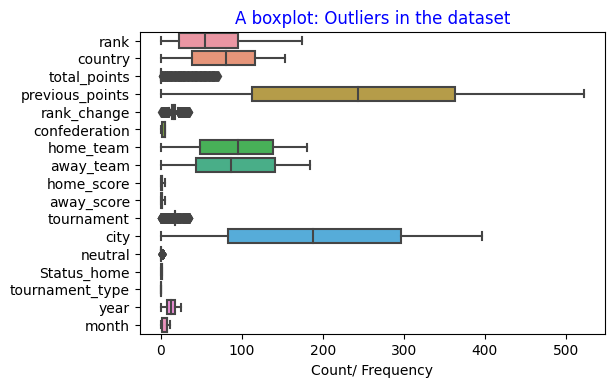

In [49]:
# checking for outliers in our dataset
# Using boxplots
# Labeling the title of our chart
# Displaying chart 

plt.figure(dpi = 100)
ax = sns.boxplot(data = df_encoded , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

The total points, rank change and tournament columns have a lot of outliers.

We will not remove them in this stage, to find out if they have an effect in our model.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

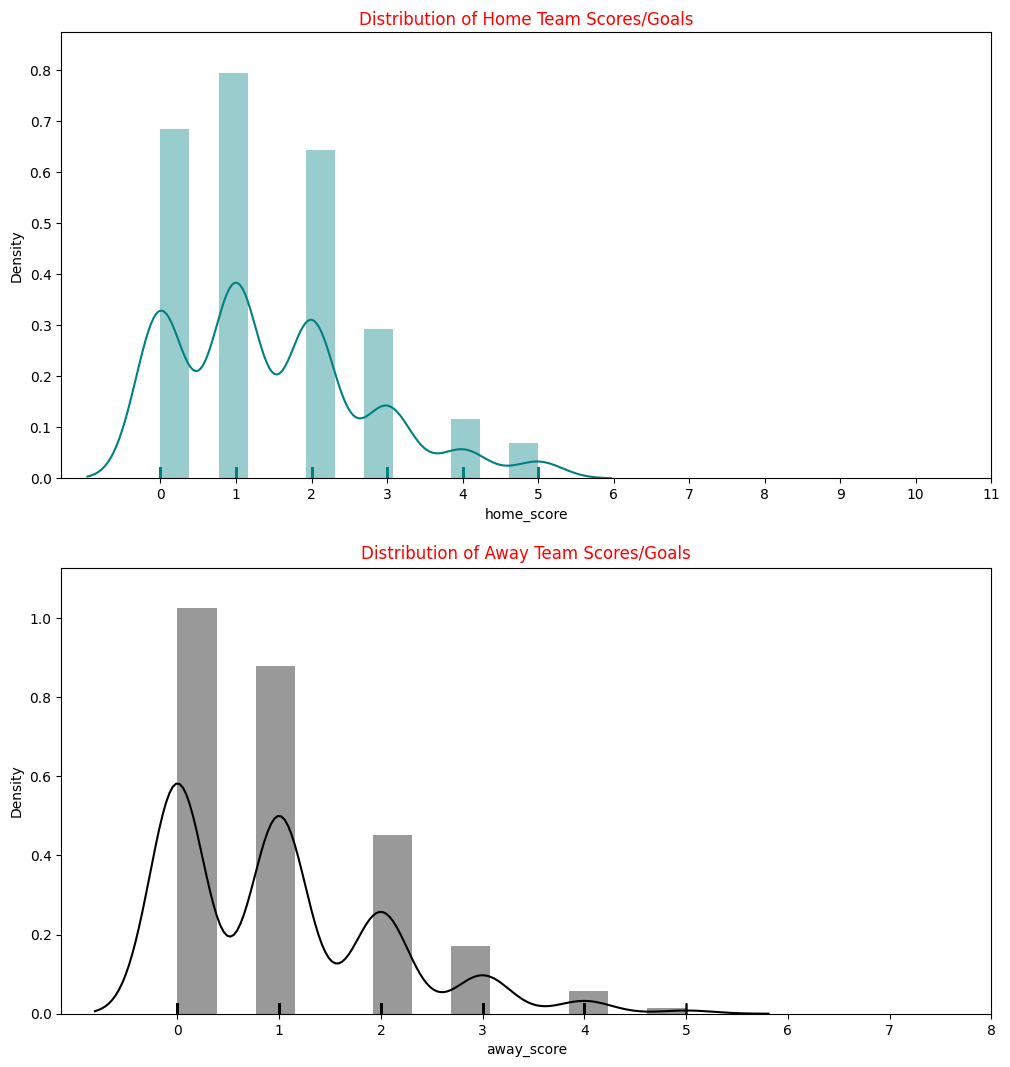

In [50]:
# Creating histograms to show the distribution of the goals for home teams and away teams
# Specifying the figure size
# Using seaborn for plotting
# Specifying the bins in the x axis
# Labeling title


plt.figure(figsize=(12,13), dpi = 100)
plt.subplot(211)
sns.distplot(df_encoded["home_score"],color="teal",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Scores/Goals",color='r')


plt.subplot(212)
sns.distplot(df_encoded["away_score"],color="black",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Scores/Goals",color='r')
plt.show()
     

The histograms show that the home teams are highly likely to score at most one goal compared to the away team.

The charts also show that the goals scored in both home and away team is skewed to the right.

This means that there is a high probability of scoring more goals.

i.e. the outliers lie on the positive side.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


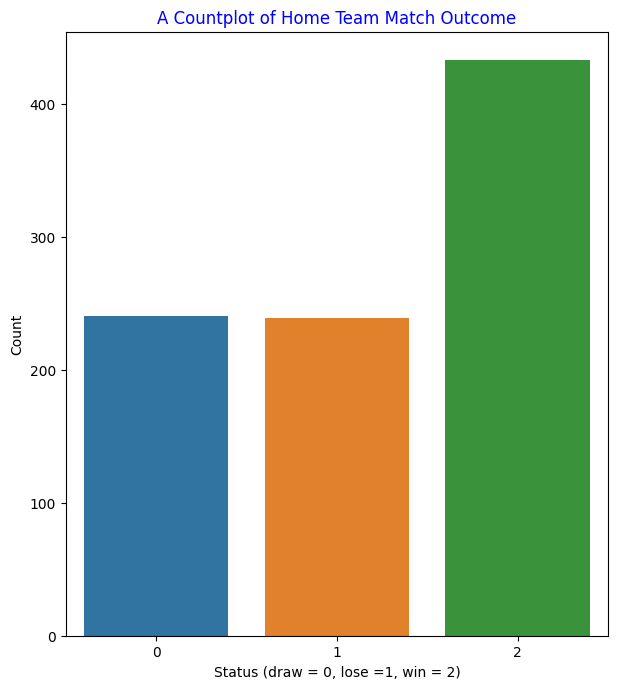

In [51]:

# The Home team Match outcome(draw = 0, lose =1, win = 2)
# Using a countplot to visualize these results
# Using Seaborn
# Labeling the x and y axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(df_encoded['Status_home'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'blue')
plt.show()
     

The bar chart above shows that in most cases the home team wins the match.

The home team is less likely to lose or draw in match.

#Multicollinearity

In [52]:

 #check if the independent variables are collinear/ correlated to each other


# Getting the pearson correation coefficient for each of the variables

correlation = df_encoded.corr()
correlation

,rank,country,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral,Status_home,tournament_type,year,month
rank,1.000000,0.032814,-0.059816,-0.644570,-0.061597,-0.414154,0.025156,-0.011722,-0.090258,0.050651,-0.110761,-0.010263,0.005663,-0.067102,NaN,0.172134,-0.044905
country,0.032814,1.000000,-0.034020,-0.037698,-0.009294,-0.178000,0.846244,0.022709,-0.031332,0.005147,-0.065159,-0.148775,0.009744,-0.034639,NaN,-0.027656,-0.039175
total_points,-0.059816,-0.034020,1.000000,0.186645,-0.033574,-0.033823,0.007732,0.042097,0.055061,0.000867,0.003411,0.002567,0.173563,0.041311,NaN,0.523465,-0.006808
previous_points,-0.644570,-0.037698,0.186645,1.000000,-0.032488,0.273950,-0.009514,-0.012800,0.025010,-0.025718,0.075480,0.043795,0.094439,0.041623,NaN,0.373750,0.016487
rank_change,-0.061597,-0.009294,-0.033574,-0.032488,1.000000,-0.036926,-0.039012,0.002030,0.068907,-0.016741,-0.045567,-0.044181,0.026749,0.082938,NaN,-0.057567,-0.047008
confederation,-0.414154,-0.178000,-0.033823,0.273950,-0.036926,1.000000,-0.133808,-0.075074,-0.034647,0.049019,0.279455,0.052950,-0.032387,-0.016237,NaN,-0.146340,0.057825
home_team,0.025156,0.846244,0.007732,-0.009514,-0.039012,-0.133808,1.000000,0.037783,-0.011457,-0.042416,-0.059844,-0.095658,-0.077645,-0.000792,NaN,-0.001400,-0.015169
away_team,-0.011722,0.022709,0.042097,-0.012800,0.002030,-0.075074,0.037783,1.000000,-0.037220,0.040347,-0.078841,-0.088915,0.063729,-0.022827,NaN,0.013146,0.031120
home_score,-0.090258,-0.031332,0.055061,0.025010,0.068907,-0.034647,-0.011457,-0.037220,1.000000,-0.089425,-0.057150,-0.005544,-0.012671,0.564747,NaN,-0.016081,-0.015244
away_score,0.050651,0.005147,0.000867,-0.025718,-0.016741,0.049019,-0.042416,0.040347,-0.089425,1.000000,-0.031227,-0.013013,0.101619,-0.229972,NaN,-0.012582,-0.036170


The correlation matrix indicates that most variables are moderately or weakly correlated.

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent variables that are statistically significant.

We aim to create a model with the most significant variables.

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).

The VIF will help in determining the variables that are collinear or highly correlated with each other.

In [53]:

# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,rank,country,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral,Status_home,tournament_type,year,month
rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
confederation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


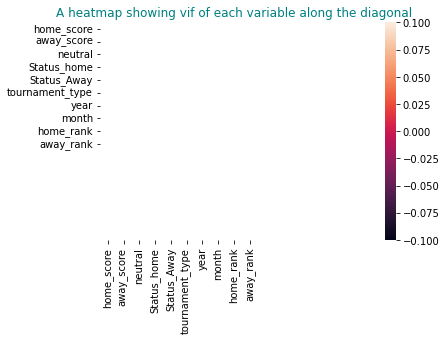

In [54]:
# Plotting a heat map to show the vif visually.
# Using the seaborn library for visualization
# Labeling the title
# Displaying the chart

vif = np.linalg.inv(correlation.values)
sns.heatmap(vif, annot = True, xticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'], yticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'teal' )
plt.show()



VIFs Values greater than 5 indicate that the presence of multicollinearity.

If present we remove the variable with the greatest VIF value.

There are no correlated independent variables as all have VIF values are below 5, which is the threshold.

#Building a Model

##1. Polynomial Regression Model

In [55]:
# Approach 1: Polynomial approach

# What to train given:

# Rank of home team
# Rank of away team
# Tournament type

# Model 1: Predict how many goals the home team scores

# Model 2: Predict how many goals the away team scores
     

In [62]:
df_encoded.head()

,rank,country,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral,Status_home,tournament_type,year,month
0,7,20,0,45,11,3,23,100,1,1,18,195,0,0,0,0,7
1,34,36,0,14,35,3,46,177,5,0,17,285,0,2,0,0,7
2,49,153,0,17,20,1,180,53,2,0,18,124,0,2,0,0,7
3,58,17,0,7,34,3,20,175,3,1,17,170,0,2,0,0,7
4,64,54,0,14,14,1,67,144,1,0,18,77,0,2,0,0,7


In [68]:

# Model 1
# Predict how many goals the home team scores given home rank
# Splitting the dataset into the features and target variable


X = df_encoded['rank'].values.reshape(-1, 1)

y = df_encoded['home_score'].values.reshape(-1, 1)
     

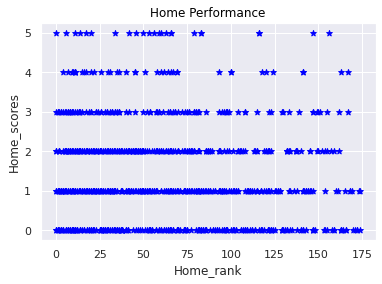

In [69]:
# Visualizing the dependent vs independent variable by plotting a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

sns.set(style = 'darkgrid')
plt.scatter(X,y, marker = '*' , color = 'blue') 
plt.title('Home Performance', color = 'black')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()


The chart above shows that there is no particular observable trend but,

There are more points on the lower side of the scatter plot.

Indicating in most cases the home team scores between 0 and 5 goals.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn import metrics


from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [66]:
# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [71]:

# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the polynomial regression model)

reg_line = LinearRegression()
reg_line.fit(X, y)
     

LinearRegression()

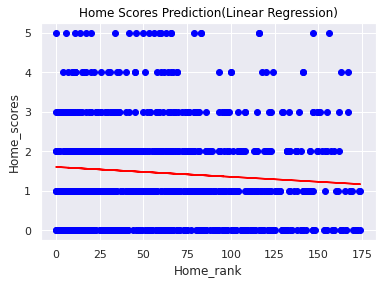

In [72]:

# Visualize the Linear Regression results
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(X, y, color='blue')
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)', color = 'black')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()

The line of best fit does not pass through a majority of the points.

hence  underfitting is detected .

Therefore, the Linear regression model is not a good fit for this prediction.

We will fit a polynomial regression and evaluate the results.

In [73]:
# Fitting the polynomial features to the X the independent variable
# We will start  with a polynomial regression of degree 2

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [74]:

# Fitting a polynomial Regression to the dataset.

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
     

LinearRegression()

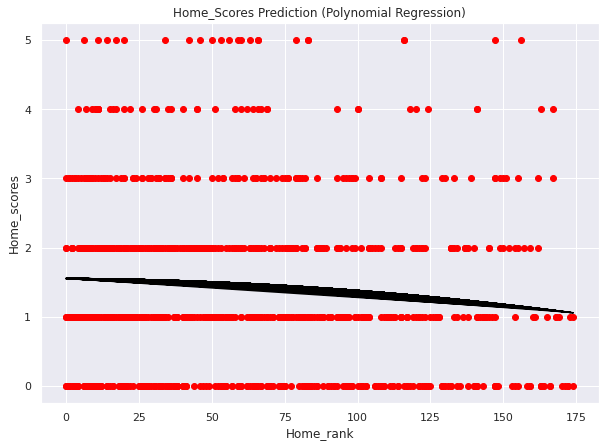

In [75]:

# Visualizing the polynomial Regression results
# Specifying the chart size
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.figure(figsize = (10,7))
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='black')
plt.title('Home_Scores Prediction (Polynomial Regression)')
plt.xlabel('Home_rank')
plt.ylabel('Home_scores')
plt.show()
     

The curve is not passing through as many points as expected  hence we can say that this graph is not fully optimized.

In [76]:

# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [77]:

# Evaluation our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))

RMSE:  1.252954231979586
r2_score:  0.008761498070154472


In [78]:

# Mean of the actual scores

np.mean(y) 
     

1.4501642935377874

In [79]:
# Ten percent of the mean

1.6026635099141757 * 0.1

0.1602663509914176

Comparing the RMSE score = 1.25 with the 10% of actual scores mean = 0.16, it is above the actual scores mean.

This means that the model is not efficient to use for predicting the home team scores.

Hence we should try a model with more degrees to improve its efficiency.

In [81]:

# Model 2: Predict how many goals the away team scores given the away team rank

#
X = df_encoded['rank'].values.reshape(-1, 1)

y = df_encoded['away_score'].values.reshape(-1, 1)

In [82]:
## Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [83]:

# Fitting the polynomial features to the X

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [84]:

# Fitting a polynomial Regression to the dataset

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

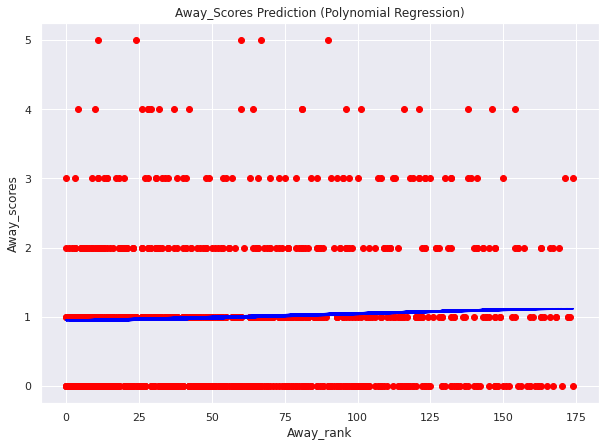

In [85]:
 # Visualizing the polynomial Regression results using a scatter plot
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart
plt.figure(figsize = (10,7))
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Away_Scores Prediction (Polynomial Regression)')
plt.xlabel('Away_rank')
plt.ylabel('Away_scores')
plt.show()
     

The curve is not passing through as many points as we'd want hence we can say that this graph is not fully optimized.
Underfitting detected.

In [86]:

# Making predictions using our model

y_pred_poly = pol_reg.predict(X_poly)

In [87]:

# Evaluating our model

print('RMSE: ' , np.sqrt(mean_squared_error(y, y_pred_poly)))
print('r2_score: ' , r2_score(y, y_pred_poly))


RMSE:  1.0550594172769379
r2_score:  0.0026424103590538817


In [ ]:
# Calculating the Mean of the actual scores 
# We will compare 10% of this mean with the RMSE

np.mean(y)
     

1.0687185557857355

Comparing the RMSE = 1.0 with 10% of the actual mean = 0.1

The RMSE is very high

Therefore this is not a good model to use for predicting the away score

##2.Logistic Regression Model

In [88]:
# Viewing the first two observations before splittig our dataset

df_encoded.head(2)
     

,rank,country,total_points,previous_points,rank_change,confederation,home_team,away_team,home_score,away_score,tournament,city,neutral,Status_home,tournament_type,year,month
0,7,20,0,45,11,3,23,100,1,1,18,195,0,0,0,0,7
1,34,36,0,14,35,3,46,177,5,0,17,285,0,2,0,0,7


In [89]:

# Splitting our dataset
# X: independent variables
# y: dependent variable

# Splitting the data into train and test sets

X = df_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1)
y = df_encoded.Status_home


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [90]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Fitting our model to our train sets
# Logistic Regression model in this case
# 

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

In [92]:

# Evalauting the model

# Getting the accuracy score of our model

print(accuracy_score(y_test, y_pred))

0.5300546448087432


The model can correctly predict if home team will (won, lost or drew) in a match with an accuracy of 53%



##  Cross-Validation (Logistic Regression Model)

In [94]:
# Using KFolds
import warnings
warnings.filterwarnings('ignore')
# Splitting our dataset
# independet variables as X
# dependent variable as y

X = df_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1).values
y = df_encoded.Status_home.values

# specifying the number of folds

folds = KFold(n_splits = 5)


# We now create and assess 10 models based on the folds we created.

RMSES = [] # An array of RMSEs to keep track of the RSME of each model
count = 1   # starting point # helps to keep track of the model number in training

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # Setting up the train and test based on the split determined by KFold
  # With 10 folds we split our data into training and test sets
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fitting a Logistic regression model
  LogReg = LogisticRegression()  
  LogReg.fit(X_train, y_train)
  
  # Assess the accuracy of the model
  y_pred = LogReg.predict(X_test)
  
  # Calculating the RMSES of each model
  # Appending each RMSE into the list earlier created
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  
  # printing each model RMSE
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1
  


Training model 1
Model 1 Root Mean Squared Error: 1.1210845646484016

Training model 2
Model 2 Root Mean Squared Error: 1.178124841464818

Training model 3
Model 3 Root Mean Squared Error: 1.0661200785361484

Training model 4
Model 4 Root Mean Squared Error: 1.0690449676496976

Training model 5
Model 5 Root Mean Squared Error: 1.1531133203941102


In [95]:

# Printing the mean and the standard deviation of the RMSES in all the 10 models

print(np.mean(RMSES))
print(np.std(RMSES))
 

1.1174975545386352
0.04459667152522805


##Heteroskedasticity

In [97]:
# First: splitting our dataset 
# Into the feature set and the target variable

X = df_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1)
y = df_encoded.Status_home

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fitting a Logistic model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction

y_pred = LogReg.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

0.6612021857923497

The mean is 0.66 indicating that we tend to be fairly accurate.

##Residual Plots

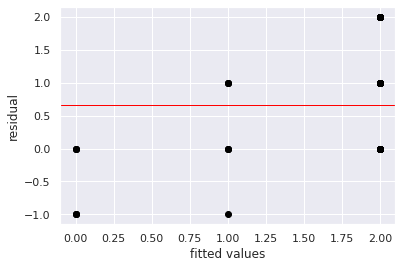

In [98]:

# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()
     

From the plot we can see that there is a constant variance.

Hence the homoscedasticity assumption is not violated.

###Barlett's test

In [99]:
import scipy as sp

# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

4.07319558812148e-23
The variances are Homogeneous!


#Challenging the solution

In [100]:
from sklearn.model_selection import GridSearchCV# Using Hyperparameter Tuning

# Splitting the dataset into independent variables and target variable

X = df_encoded.drop([ 'Status_home', 'home_score', 'away_score'], axis = 1)
y = df_encoded.Status_home
# Creating the logistic Regression

logistic = LogisticRegression()
# Creating regularization penalty space    
#  penalty term is a constraint region or a budget 
# Regulization helps to select the preferred model complexity 
# so that the model is better at predicting

# L1: uses absolute values in the penalty function
# L2: minimizes the sum of errors

penalty = ['l1', 'l2']

# Creating regularization hyperparameter space

C = np.logspace(0, 4, 10)

# Creating hyperparameters options

hyperparameters = dict(C=C, penalty = penalty)

# Creating grid search using 10-fold cross validation

clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

# Fitting grid search
best_model = clf.fit(X, y)

# Finding out the best hyperparameters available to tune the Logistic Regression model
best_model

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:

# Viewing best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
best_model.best_score_
     

Best Penalty: l2
Best C: 1291.5496650148827


0.5783351375590752

In [101]:
# Predicting target vector

best_model.predict(X)
     

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [102]:

# Using XGBOOST 

# Tuning the parameters

import xgboost as xgb

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X, y)

predictions = gbm.predict(X_test)

print(accuracy_score(y_test, predictions))


0.7595628415300546


##Conclusion
. 1.Predicting whether home team wins, loses or draws in a match

The best accuracy score using two hyperparameters is 57%
Using XGboost algorithm the accuracy score was 75%
Therefore, another algorithm can be considered to improve the accuracy score or more hyperparameters should be tuned
*****
2. Predicting the rank of a team

None of the  regularized regression models is a good fit to predict the rank; they all have RMSE scores greater than the mean of the actual.
Since this is also more of a classification problem, using regressions is not the best approach though this project was restrictive.